In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [36]:
base_path = os.getcwd()
print('base_path', base_path)

# Load the images
img1 = cv2.imread(f'{base_path}/images/img1.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(f'{base_path}/images/img2.png', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread(f'{base_path}/images/img3.png', cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread(f'{base_path}/images/img4.png', cv2.IMREAD_GRAYSCALE)  # COLOR_BGR2RGB

noice_image_list = [img1, img2]
shadow_image_list = [img3, img4]

base_path /home/shosen/training/image-noice-show-remove


In [41]:
# custom functions
def img_hist(image):
    reshaped_img = image[:, :, 0].reshape(img[:, :, 0].shape[0] * img[:, :, 0].shape[0], 1)

    plt.hist(reshaped_img, bins=256, range=(0, 255), color="blue", density=True)
    plt.show()
    # return reshaped_img
# img_hist(img)  # call

# thresholding the image on custom value thr
def threshold(image, thr):
    th_image = np.where(image < thr, image, 100)
    return th_image
# thr_img = threshold(img, 50)  # call
# plt.imshow(thr_img + 100) # show

# generating negative image
def negative(image):
    reshaped_img = image[:, :, 0].reshape(img[:, :, 0].shape[0] * img[:, :, 0].shape[0], 1)
    max_I = max(reshaped_img)
    neg = max_I - image
    return neg

def multiple_filtering(image):
    # Ensure the image is a color image (3 channels)
    if len(image.shape) == 2:  # Grayscale image
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Apply Mean Filter
    mean_filtered = cv2.blur(image, (5, 5))

    # Apply Gaussian Filter
    gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Median Filter
    median_filtered = cv2.medianBlur(image, 5)

    # Apply Bilateral Filter
    bilateral_filtered = cv2.bilateralFilter(image, 9, 75, 75)

    # Apply Non-Local Means Denoising to remove noise
    non_local_means = cv2.fastNlMeansDenoisingColored(
        image, None, h=10, templateWindowSize=7, searchWindowSize=21
    )

    # Display results
    filters = [image, mean_filtered, gaussian_filtered, median_filtered, bilateral_filtered, non_local_means]
    titles = ['Original', 'Mean Filter', 'Gaussian Filter', 'Median Filter', 'Bilateral Filter', 'Non-Local Means']

    plt.figure(figsize=(15, 10))
    for i in range(len(filters)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(cv2.cvtColor(filters[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0.05, right=0.95, top=0.9, bottom=0.1)
    plt.show()

def remove_shadows(denoised_img):
    # Step 2: Convert to grayscale for shadow removal
    gray = cv2.cvtColor(denoised_img, cv2.COLOR_BGR2GRAY)
    # Step 3: Apply adaptive thresholding to remove shadows
    _, thresholded_img = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY)
    # Step 4: Apply the thresholded image to get rid of shadows (inverted mask)
    thresholded_img_rgb = cv2.cvtColor(thresholded_img, cv2.COLOR_GRAY2RGB)
    final_result = cv2.bitwise_and(denoised_img, thresholded_img_rgb)
    return final_result

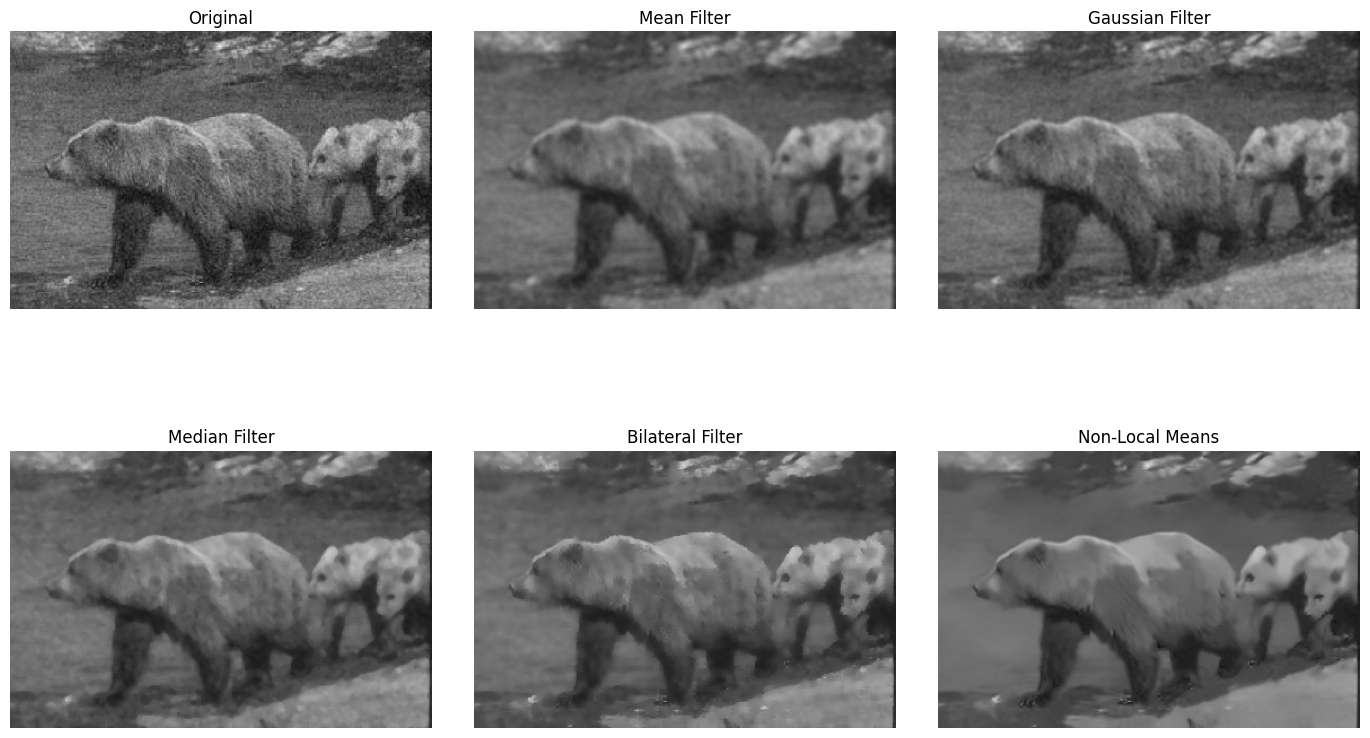

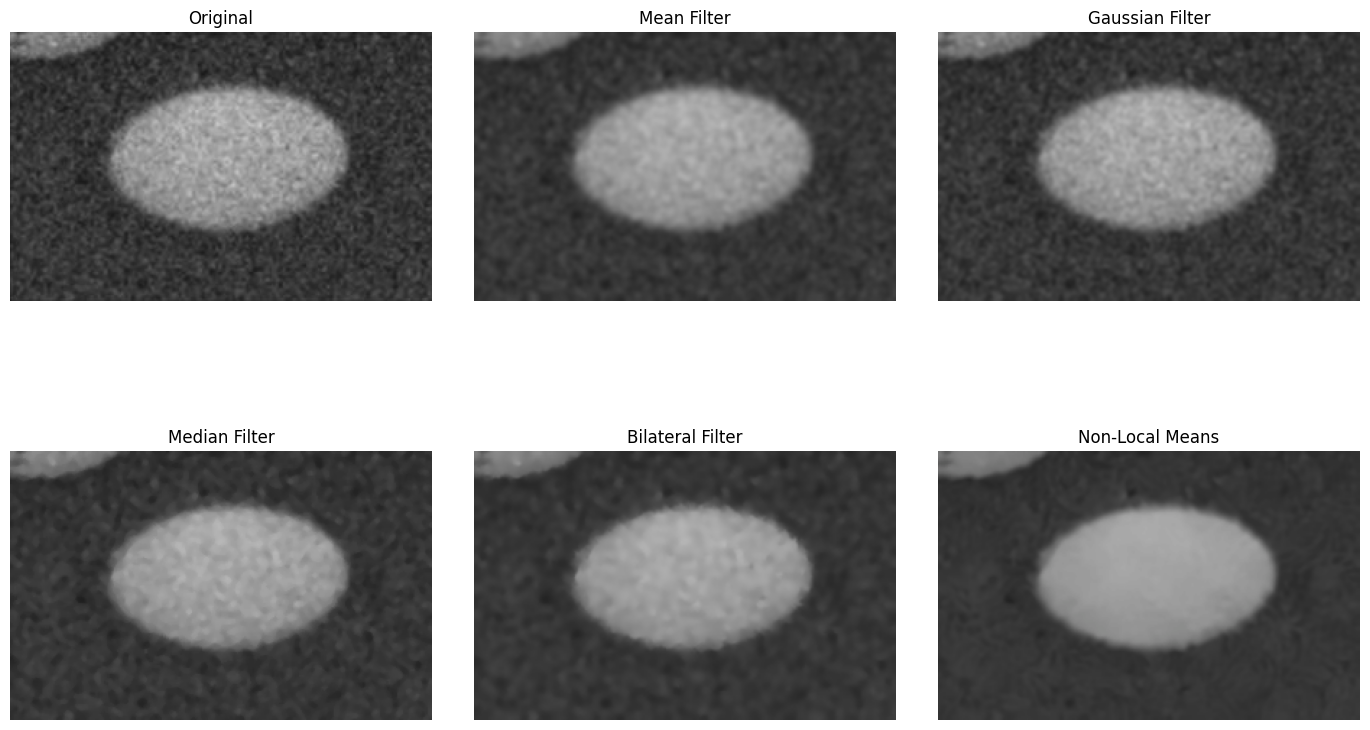

In [42]:
# Noice remove from iamge
for image in noice_image_list:
    # Apply Mean Filter
    multiple_filtering(image)

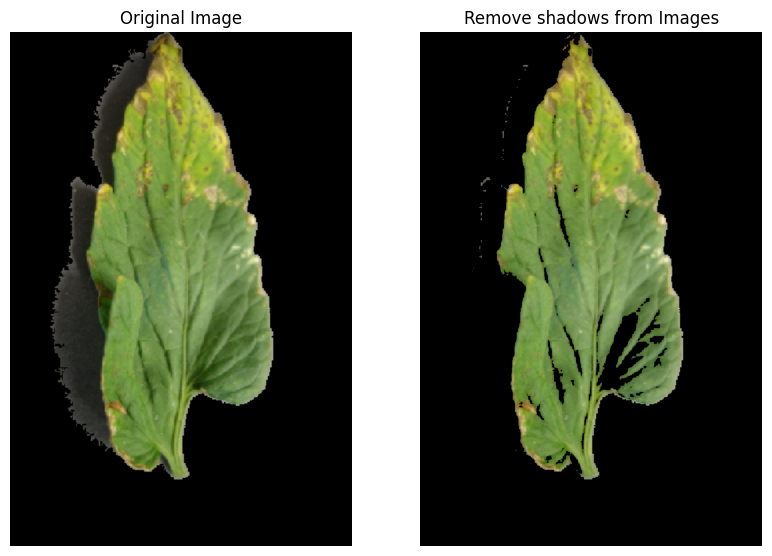

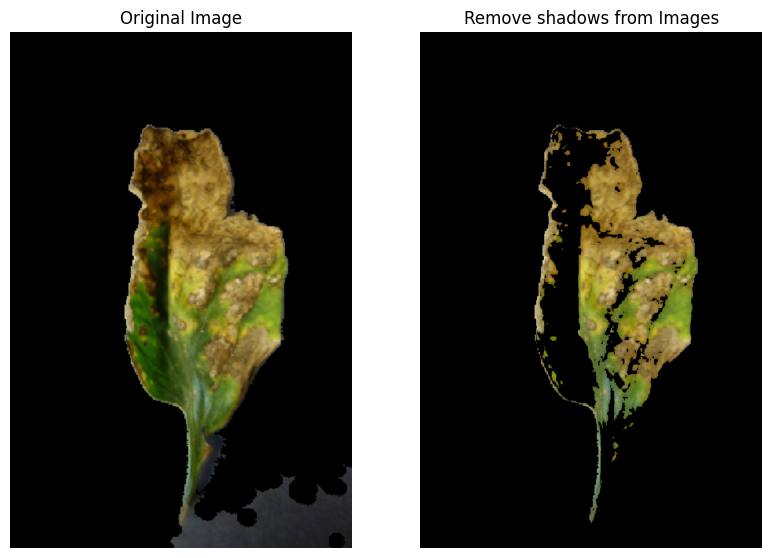

In [ ]:
for image in shadow_image_list:
    # Step 1: Display the results
    plt.figure(figsize=(15, 10))

    # Display the original image
    plt.subplot(1, 3, 1)
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    # Display the denoised image
    plt.subplot(1, 3, 2)
    denoised_rgb = cv2.cvtColor(remove_noise(image), cv2.COLOR_BGR2RGB)
    shadow_rgb = cv2.cvtColor(remove_shadows(image), cv2.COLOR_BGR2RGB)
    plt.imshow(shadow_rgb)
    plt.title('Remove shadows from Images')
    plt.axis('off')
    plt.show()